<a href="https://colab.research.google.com/github/shitkov/categorizer/blob/main/categorizer_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!wget https://github.com/shitkov/categorizer/raw/main/data_train.zip
!unzip /content/data_train.zip

In [2]:
train_path = '/content/HeadHunter_train.csv'

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv(train_path)

In [5]:
data = data.fillna('')

In [6]:
targets = list(set(list(data['target'])))

In [7]:
label_len = [len(t.split(',')) for t in list(data['target'])]

In [8]:
data['target_len'] = label_len

In [9]:
# multi-label
len(data[data['target_len'] > 1])

2760

In [10]:
# full data
len(data)

50876

In [11]:
# % multi-label
round(len(data[data['target_len'] > 1])/len(data), 3)

0.054

In [12]:
# single-label data
data_one = data[data['target_len'] == 1].copy()

In [13]:
targets = list(set(list(data_one['target'])))

In [14]:
# single labels distribution
for i in range(0, 9):
    print(i, len(data[data['target'] == str(i)]))

0 21003
1 1269
2 12
3 905
4 38
5 102
6 368
7 326
8 24093


In [15]:
data_multi = data[data['target_len'] > 1].copy()

In [16]:
# multi-label distribution
for i in range(1, 9):
    col_name = 'tag_' + str(i)
    labels = [1 if str(i) in t.split(',') else 0 for t in list(data_multi['target'])]
    data_multi[col_name] = pd.Series(labels, index=data_multi.index)
    print(col_name + ':', len(data_multi[data_multi[col_name] == 1]))

tag_1: 1848
tag_2: 1
tag_3: 234
tag_4: 73
tag_5: 274
tag_6: 701
tag_7: 65
tag_8: 2441


In [17]:
# labels sum
multi_labels_qnt = [0, 1848, 1, 234, 73, 274, 701, 65, 2441]
labels_qnt = [21003, 1269, 12, 905, 38, 102, 368, 326, 24093]
labels_sum = [i + j for i, j in zip(labels_qnt, multi_labels_qnt)]
print(labels_sum)

[21003, 3117, 13, 1139, 111, 376, 1069, 391, 26534]


In [18]:
# all labels distribution
sorted([(i, q) for i, q in enumerate(labels_sum)], key = lambda x: x[1], reverse=True)

[(8, 26534),
 (0, 21003),
 (1, 3117),
 (3, 1139),
 (6, 1069),
 (7, 391),
 (5, 376),
 (4, 111),
 (2, 13)]

In [19]:
# Избегайте предвзятых и категоричных оценок
# Не используйте грубые, нецензурные и оскорбительные высказывания
# Переход на личности
# Разглашать персональные данные
# Писать подробно
# Использовать личные примеры
# Не использовать религиозны термины
# Не использовать политические темы

In [20]:
# label 0: 21003 + 0
# label 1: 1269 + 1848
# label 2: 12 + 1
# label 3: 905 + 234
# label 4: 38 + 73
# label 5: 102 + 274
# label 6: 368 + 701
# label 7: 326 + 65
# label 8: 24093 + 2441

In [21]:
# targets:
# 0: ОК
# 1: Оскорбительные высказывания
# 2: ?Собеседование?
# 3: Мусор
# 4: Расизм, упоминание национальностей
# 5: Переход на личности: NER?
# 6: ?Штрафы, серая ЗП?
# 7: Проблемы на этапе собеседования
# 8: Слишком короткий отзыв

In [22]:
# tips and tricks:
# 0. Есть ощущение, что много косяков в разметке: возможно, стоит чистить данные перед обучением(нужно отбирать правильне примеры руками)? Сильный дисбаланс классов: как правильно учить?
# 1. Метка 1: детектор оскорбительных высказываний?
# 2. Не тренировать на метку 2: мало примеров, непонятно, что за правило нарушено (человек пишет отзыв после непрошедшего собеседования - в чем тогда отличие от 7?)
# 3. Метка 3: детектор мусора: классификация?
# 4. Метка 4: Расизм, упоминание национальностей: возможно, можно просто искать стоп-слова.
# 5. Метка 5: Переход на личности: NER?
# 6. Метка 6: ?Штрафы, серая ЗП?
# 7. Метка 7: Проблемы на этапе собеседования
# 8. Метка 8: Слишком короткий отзыв. Распределение длинн отзывов? Содержательность высказывания?
# ideas:
# 1. Как правильно склеивать данные для обучения классификаторов:
#    > Нужно добавлять метки, которые содержатся в мульти-классе, но на которые мы не учим в настоящее время: если детектим метку 1, то в кучу к классу 0 приклеиваем данные со всеми остальными метками, и мультикласс, где нет текущей метки.

###1. Анализ длины отзыва

In [23]:
for i in range(1, 9):
    col_name = 'tag_' + str(i)
    labels = [1 if str(i) in t.split(',') else 0 for t in list(data['target'])]
    data[col_name] = pd.Series(labels, index=data.index)
    print(col_name + ':', len(data[data[col_name] == 1]))

tag_1: 3117
tag_2: 13
tag_3: 1139
tag_4: 111
tag_5: 376
tag_6: 1069
tag_7: 391
tag_8: 26534


In [24]:
data['pos_len'] = [len(str(pos)) for pos in list(data['positive'])]

In [25]:
data['neg_len'] = [len(str(neg)) for neg in list(data['negative'])]

In [26]:
import numpy as np

In [27]:
import matplotlib.pyplot as plt

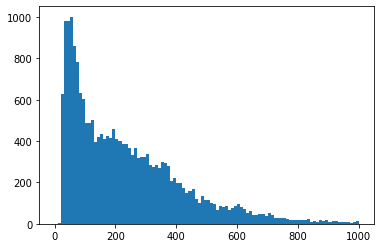

In [28]:
plt.hist(list(data[data['target'] == '0']['pos_len']), bins=100, range=(0, 1000))
plt.show() 

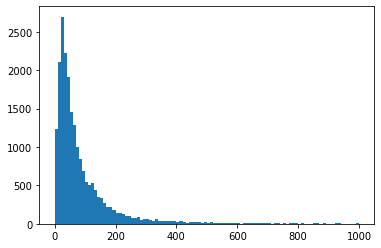

In [29]:
plt.hist(list(data[data['target'] == '0']['neg_len']), bins=100, range=(0, 1000))
plt.show() 

### Метка 8: короткий неинформативный отзыв

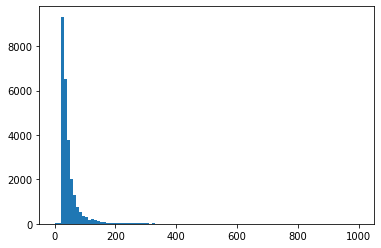

In [30]:
plt.hist(list(data[data['tag_8'] == 1]['pos_len']), bins=100, range=(0, 1000))
plt.show() 

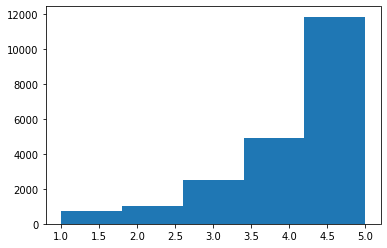

In [31]:
plt.hist(list(data[data['target'] == '0']['salary_rating']), bins=5)
plt.show() 

In [32]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms

In [33]:
rating_list = [
               'salary_rating',
               'team_rating',
               'managment_rating',
               'career_rating',
               'workplace_rating',
               'rest_recovery_rating'
]

In [34]:
target_list = ['target', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8']

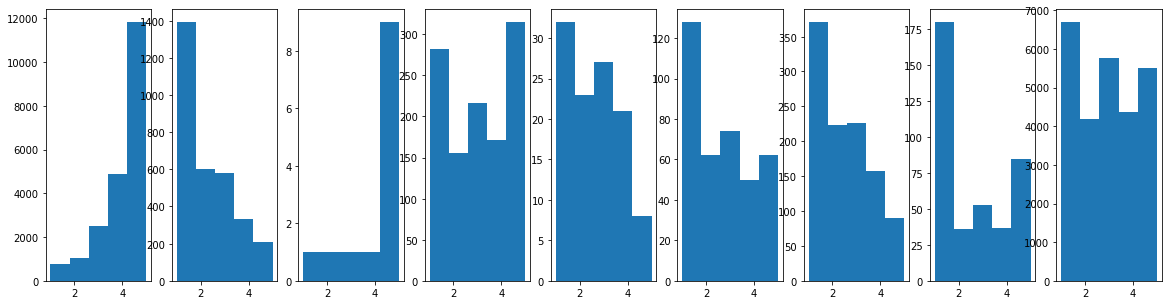

In [35]:
fig, axs = plt.subplots(1, len(target_list), figsize=(20,5))
for i, a in enumerate(axs):
    if target_list[i] == 'target':
        a.hist(list(data[data['target'] == '0']['salary_rating']), bins = 5)
    else:
        a.hist(list(data[data[target_list[i]] == 1]['salary_rating']), bins = 5)

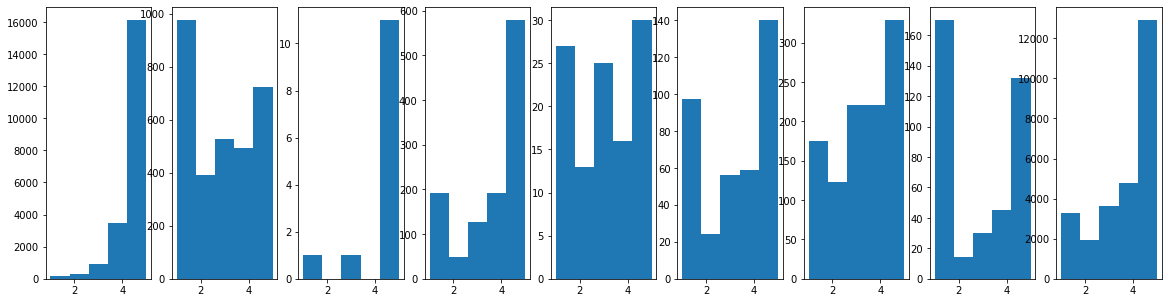

In [36]:
fig, axs = plt.subplots(1, len(target_list), figsize=(20,5))
for i, a in enumerate(axs):
    if target_list[i] == 'target':
        a.hist(list(data[data['target'] == '0'][rating_list[1]]), bins = 5)
    else:
        a.hist(list(data[data[target_list[i]] == 1][rating_list[1]]), bins = 5)

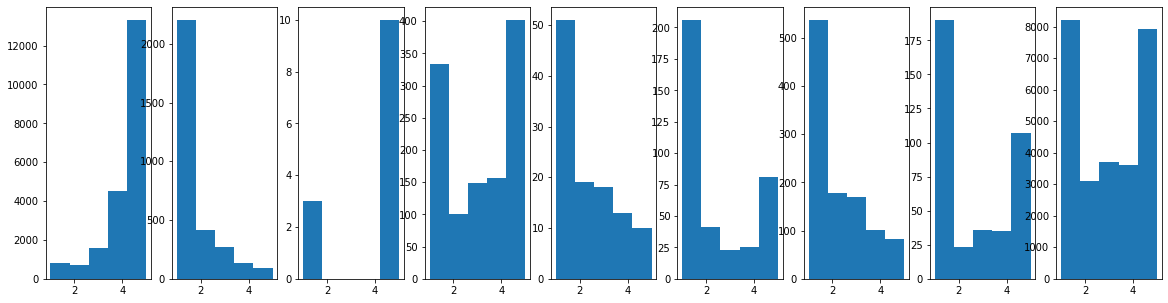

In [37]:
fig, axs = plt.subplots(1, len(target_list), figsize=(20,5))
for i, a in enumerate(axs):
    if target_list[i] == 'target':
        a.hist(list(data[data['target'] == '0'][rating_list[2]]), bins = 5)
    else:
        a.hist(list(data[data[target_list[i]] == 1][rating_list[2]]), bins = 5)

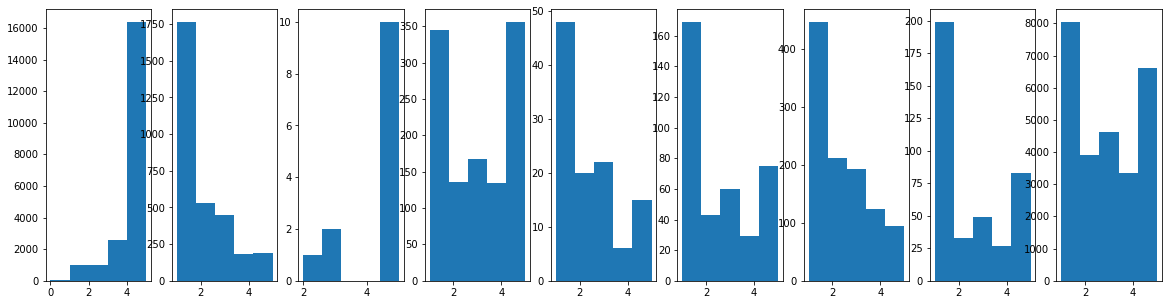

In [38]:
fig, axs = plt.subplots(1, len(target_list), figsize=(20,5))
for i, a in enumerate(axs):
    if target_list[i] == 'target':
        a.hist(list(data[data['target'] == '0'][rating_list[3]]), bins = 5)
    else:
        a.hist(list(data[data[target_list[i]] == 1][rating_list[3]]), bins = 5)

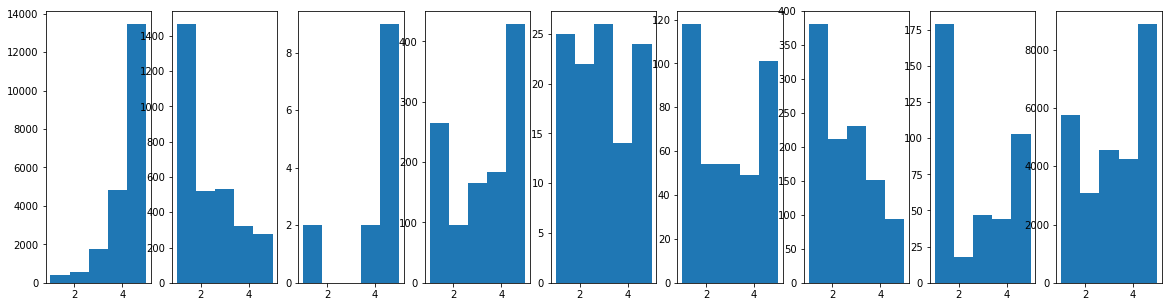

In [39]:
fig, axs = plt.subplots(1, len(target_list), figsize=(20,5))
for i, a in enumerate(axs):
    if target_list[i] == 'target':
        a.hist(list(data[data['target'] == '0'][rating_list[4]]), bins = 5)
    else:
        a.hist(list(data[data[target_list[i]] == 1][rating_list[4]]), bins = 5)

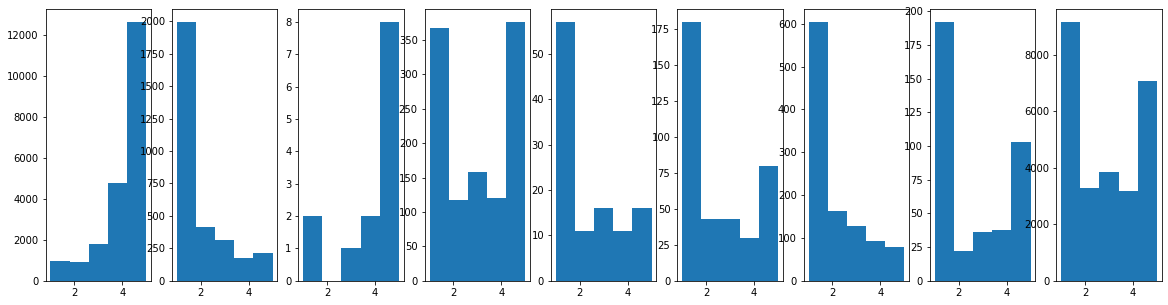

In [40]:
fig, axs = plt.subplots(1, len(target_list), figsize=(20,5))
for i, a in enumerate(axs):
    if target_list[i] == 'target':
        a.hist(list(data[data['target'] == '0'][rating_list[5]]), bins = 5)
    else:
        a.hist(list(data[data[target_list[i]] == 1][rating_list[5]]), bins = 5)

In [41]:
# чистка: стоп-слова, ТОП по частотности

In [42]:
import re

In [43]:
!wget https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt

--2022-01-22 09:33:29--  https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6229 (6.1K) [text/plain]
Saving to: ‘stopwords-ru.txt’

stopwords-ru.txt    100%[===================>]   6.08K  --.-KB/s    in 0s      

2022-01-22 09:33:29 (44.8 MB/s) - ‘stopwords-ru.txt’ saved [6229/6229]



In [44]:
with open('/content/stopwords-ru.txt') as f:
    stopwords = f.readlines()

In [45]:
stopwords = [line.rstrip('\n') for line in stopwords]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, stopwords, n=100, ngrams=(1,1)):
    stopwords = [word for word in stopwords if word not in ['не', 'нет']]
    texts = [re.sub('[^а-яё ]', ' ', str(t).lower()) for t in corpus]
    texts = [re.sub(r" +", " ", t).strip() for t in texts]
    clean_texts = []
    for text in texts:
        words = text.split(' ')
        clean_text = []
        for word in words:
            if word not in stopwords:
                clean_text.append(word)
        clean_texts.append(' '.join(clean_text))

    vec = CountVectorizer(ngram_range=ngrams).fit(clean_texts)
    bag_of_words = vec.transform(clean_texts)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = [w for w in words_freq if w[0] not in stopwords]
    return words_freq[:n]

In [47]:
texts_pos = list(data[data['target'] == '0']['positive'])
texts_pos = [re.sub('[^а-яё ]', ' ', str(t).lower()) for t in texts_pos]
texts_pos = [re.sub(r" +", " ", t).strip() for t in texts_pos]

In [48]:
get_top_n_words(texts_pos, stopwords, 100, (1,3))

[('не', 13831),
 ('коллектив', 6492),
 ('работы', 5460),
 ('компании', 4658),
 ('работаю', 3971),
 ('зарплата', 3388),
 ('возможность', 2946),
 ('график', 2827),
 ('компания', 2751),
 ('зп', 2352),
 ('условия', 2299),
 ('работу', 2247),
 ('руководство', 2054),
 ('нравится', 1835),
 ('нет', 1693),
 ('труда', 1673),
 ('вовремя', 1636),
 ('роста', 1561),
 ('работе', 1559),
 ('дружный', 1512),
 ('сотрудников', 1463),
 ('обучение', 1456),
 ('хорошая', 1412),
 ('платят', 1323),
 ('белая', 1282),
 ('офис', 1169),
 ('хорошие', 1151),
 ('рост', 1093),
 ('начальство', 1074),
 ('устраивает', 1004),
 ('задержек', 1003),
 ('оплата', 1002),
 ('зарплату', 985),
 ('отличный', 974),
 ('карьерного', 971),
 ('карьерного роста', 930),
 ('поэтому', 926),
 ('стабильная', 911),
 ('дружный коллектив', 908),
 ('опыт', 889),
 ('карьерный', 877),
 ('месяц', 876),
 ('карьерный рост', 856),
 ('плата', 855),
 ('условия труда', 854),
 ('удобный', 839),
 ('плюс', 837),
 ('отношение', 816),
 ('целом', 810),
 ('главное

In [49]:
texts_neg = list(data[data['target'] == '0']['negative'])
texts_neg = [re.sub('[^а-яё ]', ' ', str(t).lower()) for t in texts_neg]
texts_neg = [re.sub(r" +", " ", t).strip() for t in texts_neg]

get_top_n_words(texts_neg, stopwords, 100, (1,3))

[('не', 8290),
 ('нет', 2050),
 ('работы', 1944),
 ('сотрудников', 1276),
 ('устраивает', 981),
 ('компании', 959),
 ('зп', 863),
 ('труда', 821),
 ('уровень', 770),
 ('график', 744),
 ('хотелось', 741),
 ('условия', 738),
 ('улучшить', 675),
 ('работе', 600),
 ('работу', 572),
 ('зарплату', 572),
 ('роста', 539),
 ('отношение', 513),
 ('сотрудникам', 469),
 ('минусов', 438),
 ('компания', 430),
 ('возможность', 427),
 ('знаю', 421),
 ('зарплата', 408),
 ('приходится', 404),
 ('повысить', 402),
 ('заработной', 397),
 ('платы', 395),
 ('увеличить', 394),
 ('не знаю', 385),
 ('руководства', 375),
 ('заработной платы', 371),
 ('плату', 366),
 ('отдыха', 362),
 ('нравится', 359),
 ('руководство', 359),
 ('отлично', 353),
 ('заработную', 347),
 ('заработную плату', 345),
 ('карьерного', 332),
 ('сотрудниками', 329),
 ('сложно', 328),
 ('условия труда', 326),
 ('целом', 325),
 ('побольше', 317),
 ('карьерного роста', 311),
 ('систему', 305),
 ('зарплаты', 295),
 ('постоянно', 286),
 ('людей'

### Лемматизация

In [50]:
!pip install pymystem3

from pymystem3 import Mystem
mstm = Mystem()

!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /root/.local/bin/mystem

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


--2022-01-22 09:34:03--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.241, 5.45.205.244, 5.45.205.242, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.241|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz [following]
--2022-01-22 09:34:04--  http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)... 5.45.205.221, 2a02:6b8::3:221
Connecting to cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)|5.45.205.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz’

mystem-3.0-linux3.1 100%[===================>]  15.70M  9

In [51]:
from pymystem3 import Mystem
lemmatizer = Mystem()

In [52]:
def lemmatize(text, lemmatizer):
    # clear text
    text = re.sub('[^а-яё ]', ' ', str(text).lower())
    text = re.sub(r" +", " ", text)
    # get normalized input text
    lemmatized_text_list = [token for token in lemmatizer.lemmatize(text)[:-1] if token != ' ']
    return ' '.join(lemmatized_text_list)

In [53]:
texts_positive = list(data['positive'])
texts_negative = list(data['negative'])

In [54]:
from tqdm import tqdm

In [55]:
texts_positive_lemmatized = []
for text in tqdm(texts_positive):
    texts_positive_lemmatized.append(lemmatize(text, lemmatizer))

100%|██████████| 50876/50876 [00:51<00:00, 980.09it/s] 


In [56]:
texts_negative_lemmatized = []
for text in tqdm(texts_negative):
    texts_negative_lemmatized.append(lemmatize(text, lemmatizer))

100%|██████████| 50876/50876 [00:34<00:00, 1479.90it/s]


In [57]:
data['positive_lemm'] = texts_positive_lemmatized

In [58]:
data['negative_lemm'] = texts_negative_lemmatized

In [59]:
get_top_n_words(texts_positive_lemmatized, stopwords, 100, (1,3))

[('не', 19781),
 ('коллектив', 10942),
 ('компания', 10916),
 ('зарплата', 7286),
 ('график', 6776),
 ('возможность', 5825),
 ('сотрудник', 4446),
 ('условие', 4267),
 ('руководство', 4025),
 ('нравиться', 3933),
 ('рост', 3931),
 ('зп', 3535),
 ('труд', 3278),
 ('отличный', 3007),
 ('карьерный', 2896),
 ('нет', 2881),
 ('офис', 2865),
 ('рабочий', 2814),
 ('обучение', 2806),
 ('стабильность', 2608),
 ('карьерный рост', 2537),
 ('плата', 2454),
 ('плюс', 2436),
 ('близость', 2402),
 ('получать', 2276),
 ('опыт', 2274),
 ('заработный', 2264),
 ('заработный плата', 2254),
 ('отношение', 2251),
 ('стабильный', 2217),
 ('месяц', 2151),
 ('оплата', 2144),
 ('помогать', 2108),
 ('вовремя', 2088),
 ('дружный', 2073),
 ('удобный', 2072),
 ('платить', 1973),
 ('руководитель', 1853),
 ('интересный', 1837),
 ('условие труд', 1718),
 ('уровень', 1712),
 ('начальство', 1647),
 ('приходить', 1603),
 ('устраивать', 1570),
 ('высокий', 1537),
 ('клиент', 1521),
 ('зарабатывать', 1504),
 ('задержка', 1

In [60]:
get_top_n_words(texts_negative_lemmatized, stopwords, 100, (1,3))

[('не', 18136),
 ('сотрудник', 8438),
 ('зарплата', 4559),
 ('руководство', 4544),
 ('отношение', 3948),
 ('труд', 3792),
 ('условие', 3718),
 ('плата', 3498),
 ('компания', 3473),
 ('нет', 3400),
 ('заработный', 3317),
 ('заработный плата', 3294),
 ('улучшать', 2970),
 ('уровень', 2882),
 ('график', 2306),
 ('зп', 2301),
 ('рост', 2175),
 ('коммуникация', 2010),
 ('оплата', 2009),
 ('рабочий', 1998),
 ('условие труд', 1950),
 ('руководитель', 1873),
 ('возможность', 1698),
 ('карьерный', 1576),
 ('устраивать', 1538),
 ('система', 1518),
 ('коллектив', 1467),
 ('повышать', 1421),
 ('работник', 1375),
 ('персонал', 1366),
 ('карьерный рост', 1352),
 ('оплата труд', 1284),
 ('отдых', 1283),
 ('мотивация', 1244),
 ('офис', 1218),
 ('хотеться', 1186),
 ('отдел', 1167),
 ('клиент', 1163),
 ('отношение сотрудник', 1144),
 ('увеличивать', 1134),
 ('коммуникация сотрудник', 1123),
 ('обучение', 1116),
 ('план', 1071),
 ('минус', 1051),
 ('магазин', 1035),
 ('процесс', 983),
 ('приходиться', 96

In [61]:
# 1. Нагенерить фичи
# 2. Как учить
# 3. Как учить при дисбалансе классов

In [62]:
!pip install transformers sentencepiece

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 53.0 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 51.5 MB/s 
     |████████████████████████████████| 3.3 MB 46.3 MB/s 
     |████████████████████████████████| 895 kB 50.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [63]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [64]:
# Toxic
model_checkpoint = 'cointegrated/rubert-tiny-sentiment-balanced'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
if torch.cuda.is_available():
    model.cuda()

def get_sentiment(text, return_type='label'):
    """ Calculate sentiment of a text. `return_type` can be 'label', 'score' or 'proba' """
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(model.device)
        proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()[0]
    if return_type == 'label':
        return model.config.id2label[proba.argmax()]
    elif return_type == 'score':
        return proba.dot([-1, 0, 1])
    return proba

Downloading:   0%|          | 0.00/377 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/235k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/457k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/884 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/45.0M [00:00<?, ?B/s]

In [65]:
text = 'Какая гадость эта ваша заливная рыба!'
# classify the text
print(get_sentiment(text, 'label'))  # negative
# score the text on the scale from -1 (very negative) to +1 (very positive)
print(get_sentiment(text, 'score'))  # -0.5894946306943893
# calculate probabilities of all labels
print(get_sentiment(text, 'proba'))  # [0.7870447  0.4947824  0.19755007]

negative
-0.5894947648048401
[0.78704476 0.4947824  0.19755   ]


In [66]:
# Sentiment
model_checkpoint = 'cointegrated/rubert-tiny-sentiment-balanced'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
if torch.cuda.is_available():
    model.cuda()

In [67]:
def get_sentiment(text, return_type='label'):
    """ Calculate sentiment of a text. `return_type` can be 'label', 'score' or 'proba' """
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(model.device)
        proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()[0]
    if return_type == 'label':
        return model.config.id2label[proba.argmax()]
    elif return_type == 'score':
        return proba.dot([-1, 0, 1])
    return proba

In [68]:
text = 'Какая гадость эта ваша заливная рыба!'
# classify the text
print(get_sentiment(text, 'label'))  # negative
# score the text on the scale from -1 (very negative) to +1 (very positive)
print(get_sentiment(text, 'score'))  # -0.5894946306943893
# calculate probabilities of all labels
print(get_sentiment(text, 'proba'))  # [0.7870447  0.4947824  0.19755007]

negative
-0.5894947648048401
[0.78704476 0.4947824  0.19755   ]


In [69]:
# Emotion detection
# LABELS = ['no_emotion', 'joy', 'sadness', 'surprise', 'fear', 'anger']
model_checkpoint = 'cointegrated/rubert-tiny2-cedr-emotion-detection'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)
if torch.cuda.is_available():
    model.cuda()

Downloading:   0%|          | 0.00/379 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/111M [00:00<?, ?B/s]

In [70]:
def get_emotion(text, return_type='label'):
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(model.device)
        proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()[0]
    if return_type == 'label':
        return model.config.id2label[proba.argmax()]
    elif return_type == 'score':
        return proba.dot([0,1,-1,0,-1,-1])
    return proba

In [71]:
text = 'Какая гадость эта ваша заливная рыба!'
# classify the text
print(get_emotion(text, 'label'))  # negative
# score the text on the scale from -1 (very negative) to +1 (very positive)
print(get_emotion(text, 'score'))  # -0.5894946306943893
# calculate probabilities of all labels
print(get_emotion(text, 'proba'))  # [0.7870447  0.4947824  0.19755007]

anger
-0.7535506580024958
[0.08020031 0.05901022 0.01618182 0.17616493 0.01369194 0.7826871 ]


In [ ]:
# Заполнить значения для сентимента, etc

In [ ]:
# Выделить топ слов по pos-neg для каждого класса

In [ ]:
# Проиндексировать выборку: id

In [ ]:
# разделить на train-valid-test

In [72]:
# FastText: функция

In [73]:
# LaBSE: функция ~ 500 Мб: https://huggingface.co/cointegrated/LaBSE-en-ru

In [74]:
# Как бороться с дисбалансом классов при обучении классификаторов?

In [75]:
# Random Forest
# Support Vector Machine
# K Nearest Neighbors
# Gradient Boosting

# Multinomial Naïve Bayes
# Multinomial Logistic Regression

In [76]:
# Распределение оценок по отзывам: несоответствие оценок? Предсказывать оценку по отзыву > выявлять несоответствие?